# Model 2: Random Forest

* RandomForst and combinations of feature selection, nested y classes
* BoostedClassifer 
* timeseriessplit for train/test split and cross validation, given sequenced data

In [39]:
from dotenv import load_dotenv
import sys
import warnings

from __init__ import get_base_path
import data.load_data as load_data
import models.model_utils as models

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report, \
    roc_curve, RocCurveDisplay

import numpy as np
import os
import pandas as pd
from pandas.api.types import is_numeric_dtype
from matplotlib import pyplot as plt
import seaborn as sns

load_dotenv()
warnings.filterwarnings('ignore')

In [40]:
random_state = int(os.getenv('RANDOM_SEED'))

# Load Data

In [41]:
csv_file = load_data.combined_csv

df = load_data.load_from_csv(csv_file)

pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', df.shape[0])

(78288, 232)


# Training Loop

* iterate X, y feature combinations
* train, test, split - time series split given signal sequence
* scale and one-hot encode
* train
* evaluate

In [42]:
features = models.FeatureStore(df)

X_features = [['R1_Phase_A_power_wave'], features.R1_waves, features.R1_R2_waves] # features.all_power_waves
y_features = [features.y_binary, features.y_tertiary, features.y_broad_class, features.y_full_class]

In [43]:
# TRAINING WITH TIME SERIES CROSS VALIDATION
timecv = TimeSeriesSplit(n_splits=5)
clf = RandomForestClassifier(random_state=random_state, n_jobs=-1)

exp = models.SK_Classification_Experiment(df, X_features, y_features, estimators=[clf])
exp.run_experiments()

# Evaluation - Classification Reports

### Binary Class Predictions

In [44]:
binary_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_binary]

for i in binary_predictions:
    print(i['X_features'])
    print('Training Scores')
    print(i['training_classification_report'])
    print('Test Scores')
    print(i['test_classification_report'])

['R1_Phase_A_power_wave']
Training Scores
              precision    recall  f1-score   support

      attack       0.98      1.00      0.99     44279
  not attack       1.00      0.96      0.98     18352

    accuracy                           0.99     62631
   macro avg       0.99      0.98      0.99     62631
weighted avg       0.99      0.99      0.99     62631

Test Scores
              precision    recall  f1-score   support

      attack       0.72      0.71      0.72     11295
  not attack       0.27      0.28      0.27      4362

    accuracy                           0.59     15657
   macro avg       0.49      0.49      0.49     15657
weighted avg       0.59      0.59      0.59     15657

['R1_Phase_A_voltage_wave', 'R1_Phase_A_current_wave', 'R1_Phase_A_power_wave', 'R1_Phase_B_voltage_wave', 'R1_Phase_B_current_wave', 'R1_Phase_B_power_wave', 'R1_Phase_C_voltage_wave', 'R1_Phase_C_current_wave', 'R1_Phase_C_power_wave']
Training Scores
              precision    recall  f1-

### Tertiary Class Predictions

In [45]:
tertiary_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_tertiary]

for i in tertiary_predictions:
    print(i['X_features'])
    print('Training Scores')
    print(i['training_classification_report'])
    print('Test Scores')
    print(i['test_classification_report'])

['R1_Phase_A_power_wave']
Training Scores
              precision    recall  f1-score   support

      attack       0.98      1.00      0.99     44279
     natural       1.00      0.95      0.97     14738
    no event       1.00      1.00      1.00      3614

    accuracy                           0.99     62631
   macro avg       0.99      0.98      0.99     62631
weighted avg       0.99      0.99      0.99     62631

Test Scores
              precision    recall  f1-score   support

      attack       0.72      0.71      0.72     11295
     natural       0.22      0.21      0.22      3571
    no event       0.06      0.08      0.07       791

    accuracy                           0.57     15657
   macro avg       0.33      0.33      0.33     15657
weighted avg       0.57      0.57      0.57     15657

['R1_Phase_A_voltage_wave', 'R1_Phase_A_current_wave', 'R1_Phase_A_power_wave', 'R1_Phase_B_voltage_wave', 'R1_Phase_B_current_wave', 'R1_Phase_B_power_wave', 'R1_Phase_C_voltage_wave'

### Broad Class Predictions

In [46]:
broad_class_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_broad_class]

for i in broad_class_predictions:
    print(i['X_features'])
    print('Training Scores')
    print(i['training_classification_report'])
    print('Test Scores')
    print(i['test_classification_report'])

['R1_Phase_A_power_wave']
Training Scores
                     precision    recall  f1-score   support

       attack fault       0.95      1.00      0.97     26975
 attack maintenance       1.00      0.99      0.99      2632
  command injection       1.00      0.95      0.97      6790
     data injection       1.00      0.95      0.97      7882
      natural fault       1.00      0.95      0.97     12032
natural maintenance       1.00      0.95      0.97      2706
           no event       1.00      1.00      1.00      3614

           accuracy                           0.98     62631
          macro avg       0.99      0.97      0.98     62631
       weighted avg       0.98      0.98      0.98     62631

Test Scores
                     precision    recall  f1-score   support

       attack fault       0.46      0.46      0.46      7223
 attack maintenance       0.03      0.04      0.04       514
  command injection       0.13      0.11      0.12      1947
     data injection       0

### Full Class Predictions

In [47]:
full_class_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_full_class]

for i in full_class_predictions:
    print(i['X_features'])
    print('Training Scores')
    print(i['training_classification_report'])
    print('Test Scores')
    print(i['test_classification_report'])

['R1_Phase_A_power_wave']
Training Scores
                                                              precision    recall  f1-score   support

                                     Command Injection to R1       1.00      0.87      0.93      1110
                                     Command Injection to R2       1.00      1.00      1.00      1090
                                     Command Injection to R3       1.00      1.00      1.00       994
                                     Command Injection to R4       1.00      1.00      1.00       968
                              Command injection to R1 and R2       1.00      0.88      0.93      1514
                              Command injection to R3 and R4       1.00      1.00      1.00      1114
                                     Fault from 10-19% on L1       1.00      0.87      0.93      1284
            Fault from 10-19% on L1 with R1 disabled & fault       1.00      1.00      1.00      1030
Fault from 10-19% on L1 with data injec

# Evaluation - Get Feature Importance

Compare coefficients across the top and worst performing models.

* The binary/tertiary models were 'best performing' model by metric. The full class model with R1 & R2 features was among the worst performing experiments by metric. Both models assigned constant/equal importance to each feature... not helpful.

In [48]:
def plot_importance(X_cols, clf):
    importance = [(i, j) for i, j in zip(X_cols, np.round(clf.feature_importances_,2))]

    importance = pd.DataFrame(importance, columns=['feature','importance'], index=range(len(importance)))
    importance.sort_values(by='importance',ascending=False,inplace=True)

    # largest and smallest coeff
    top_importance = importance.head(8)
    bottom_importance = importance.tail(8)

    fig, ax = plt.subplots(2,1, figsize=(12.5,4))
   
    # plot top coeff
    g0 = ax[0].barh(top_importance['feature'],top_importance['importance'])
    ax[0].set_title('Top Features (Importance)')
    ax[0].bar_label(g0, fmt=lambda x: f'{x:.2f}')

    # plot bottom coeff
    g1 = ax[1].barh(bottom_importance['feature'],bottom_importance['importance'])
    ax[1].set_title('Bottom Features (Importance)')
    ax[1].bar_label(g1, fmt=lambda x: f'{x:.2f}')

    plt.tight_layout()
    plt.show()

    return importance

['R1_Phase_A_voltage_wave', 'R1_Phase_A_current_wave', 'R1_Phase_A_power_wave', 'R1_Phase_B_voltage_wave', 'R1_Phase_B_current_wave', 'R1_Phase_B_power_wave', 'R1_Phase_C_voltage_wave', 'R1_Phase_C_current_wave', 'R1_Phase_C_power_wave']
is_attack


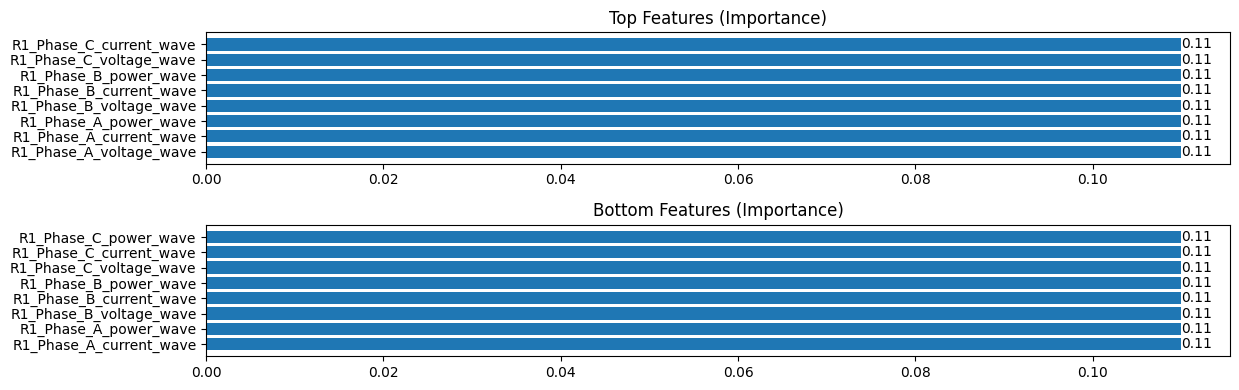

,feature,importance
0,R1_Phase_A_voltage_wave,0.11
1,R1_Phase_A_current_wave,0.11
2,R1_Phase_A_power_wave,0.11
3,R1_Phase_B_voltage_wave,0.11
4,R1_Phase_B_current_wave,0.11
5,R1_Phase_B_power_wave,0.11
6,R1_Phase_C_voltage_wave,0.11
7,R1_Phase_C_current_wave,0.11
8,R1_Phase_C_power_wave,0.11


In [49]:
# binary example - 4th index is R1 wave features
clf = exp.experiment_scores[4]['estimator']
X_features = exp.experiment_scores[4]['X_features']

print(X_features)
print(exp.experiment_scores[4]['y_features'])

plot_importance(X_features, clf)

['R1_Phase_A_voltage_wave', 'R1_Phase_A_current_wave', 'R1_Phase_A_power_wave', 'R1_Phase_B_voltage_wave', 'R1_Phase_B_current_wave', 'R1_Phase_B_power_wave', 'R1_Phase_C_voltage_wave', 'R1_Phase_C_current_wave', 'R1_Phase_C_power_wave', 'R2_Phase_A_voltage_wave', 'R2_Phase_A_current_wave', 'R2_Phase_A_power_wave', 'R2_Phase_B_voltage_wave', 'R2_Phase_B_current_wave', 'R2_Phase_B_power_wave', 'R2_Phase_C_voltage_wave', 'R2_Phase_C_current_wave', 'R2_Phase_C_power_wave']
scenario_type


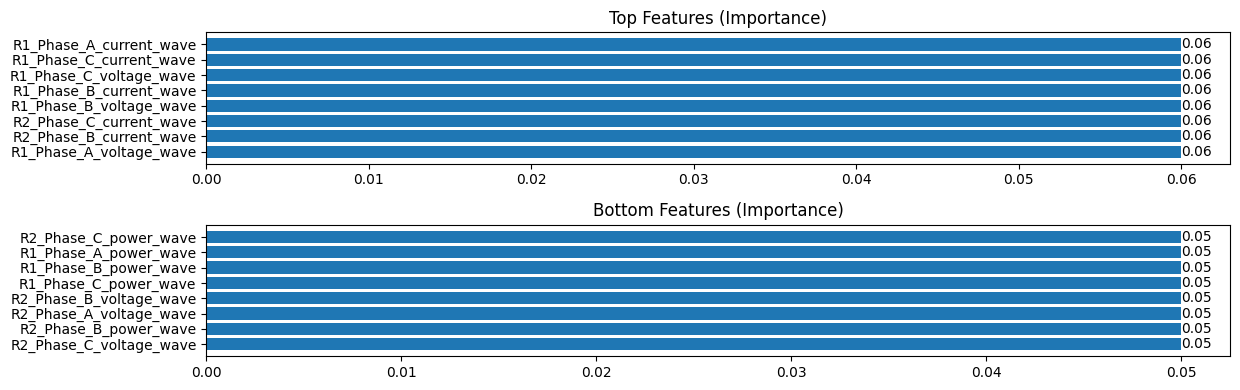

,feature,importance
0,R1_Phase_A_voltage_wave,0.06
13,R2_Phase_B_current_wave,0.06
16,R2_Phase_C_current_wave,0.06
3,R1_Phase_B_voltage_wave,0.06
4,R1_Phase_B_current_wave,0.06
6,R1_Phase_C_voltage_wave,0.06
7,R1_Phase_C_current_wave,0.06
1,R1_Phase_A_current_wave,0.06
10,R2_Phase_A_current_wave,0.06
11,R2_Phase_A_power_wave,0.06


In [50]:
# full class model - 11th index is R1R2 wave features
clf = exp.experiment_scores[11]['estimator']
X_features = exp.experiment_scores[11]['X_features']

print(X_features)
print(exp.experiment_scores[11]['y_features'])

plot_importance(X_features, clf)

['R1_Phase_A_voltage_wave', 'R1_Phase_A_current_wave', 'R1_Phase_A_power_wave', 'R1_Phase_B_voltage_wave', 'R1_Phase_B_current_wave', 'R1_Phase_B_power_wave', 'R1_Phase_C_voltage_wave', 'R1_Phase_C_current_wave', 'R1_Phase_C_power_wave']
scenario_class


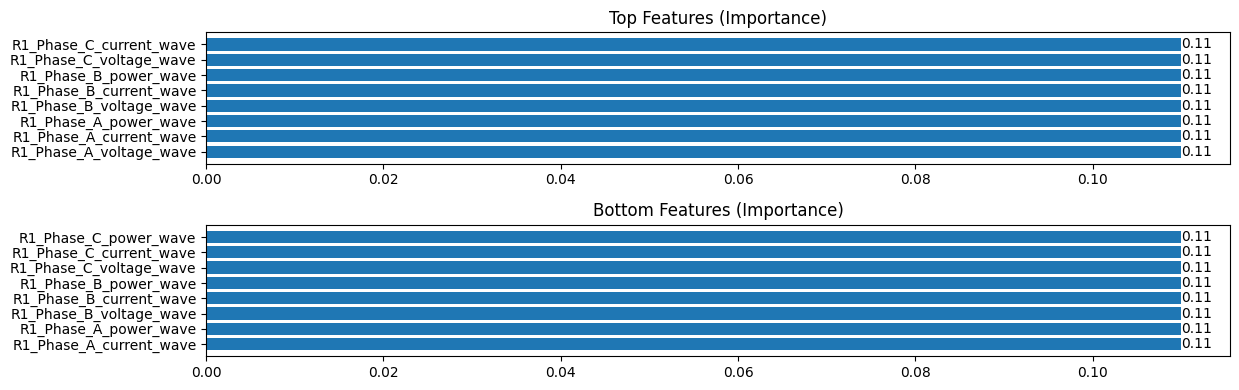

,feature,importance
0,R1_Phase_A_voltage_wave,0.11
1,R1_Phase_A_current_wave,0.11
2,R1_Phase_A_power_wave,0.11
3,R1_Phase_B_voltage_wave,0.11
4,R1_Phase_B_current_wave,0.11
5,R1_Phase_B_power_wave,0.11
6,R1_Phase_C_voltage_wave,0.11
7,R1_Phase_C_current_wave,0.11
8,R1_Phase_C_power_wave,0.11


In [51]:
# best experiment - 5th index is R1 wave features + tertiary class
clf = exp.experiment_scores[5]['estimator']
X_features = exp.experiment_scores[5]['X_features']

print(X_features)
print(exp.experiment_scores[5]['y_features'])

plot_importance(X_features, clf)

# Evaluation - Confusion Matrix

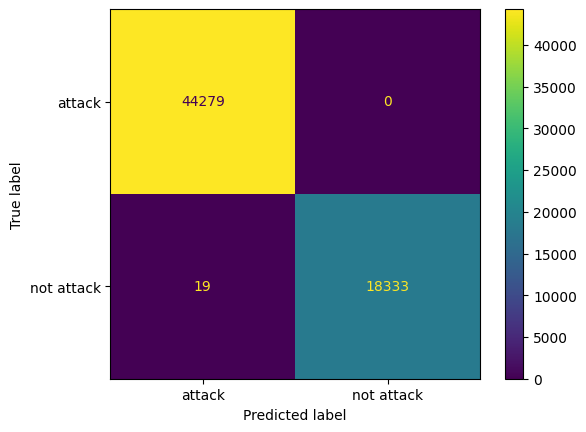

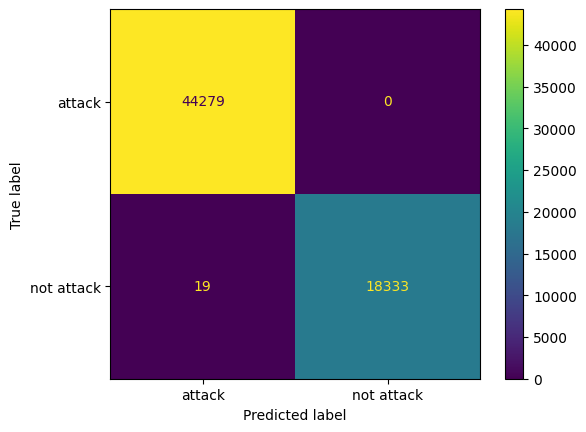

In [52]:
# binary example - 4th index is R1 wave features
y_true = exp.experiment_scores[4]['train_true']
y_pred = exp.experiment_scores[4]['train_pred']
labels = exp.experiment_scores[4]['y_classes']

disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels)
disp.plot()
plt.show()

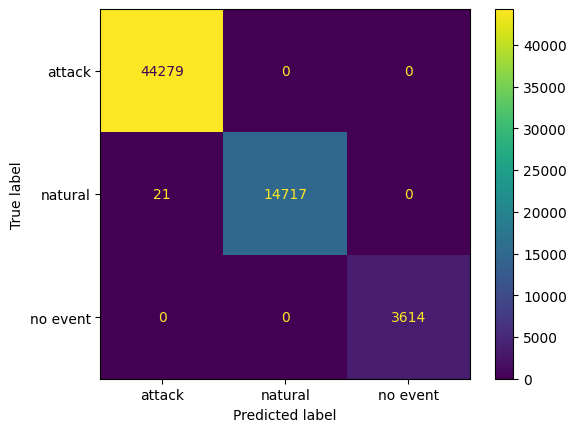

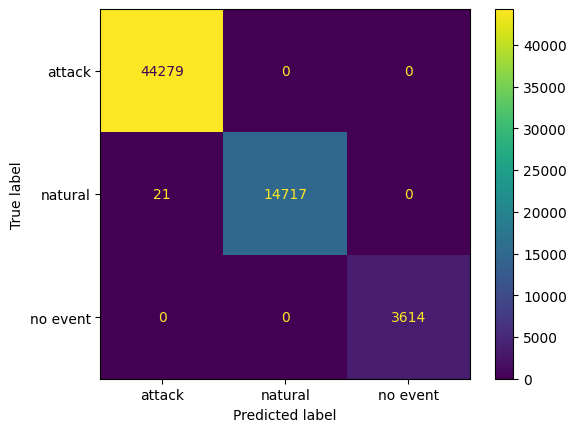

In [53]:
# tertiary example - 5th index is R1 wave features
y_true = exp.experiment_scores[5]['train_true']
y_pred = exp.experiment_scores[5]['train_pred']
labels = exp.experiment_scores[5]['y_classes']

disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels)
disp.plot()
plt.show()

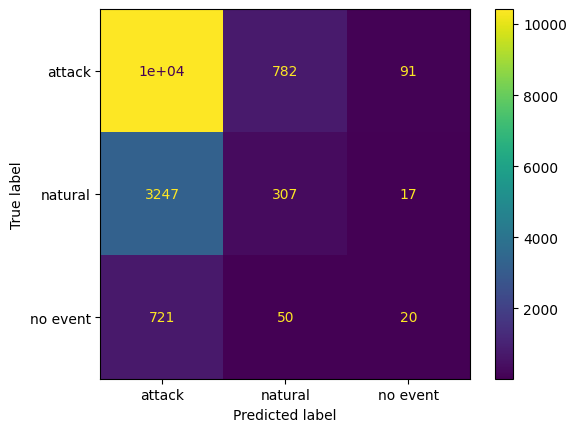

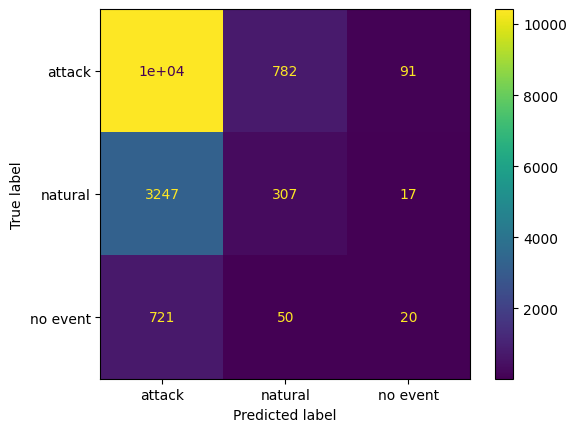

In [54]:
# tertiary example - 5th index is R1 wave features
y_true = exp.experiment_scores[5]['test_true']
y_pred = exp.experiment_scores[5]['test_pred']
labels = exp.experiment_scores[5]['y_classes']

disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels)
disp.plot()
plt.show()

# Evaluation - ROC

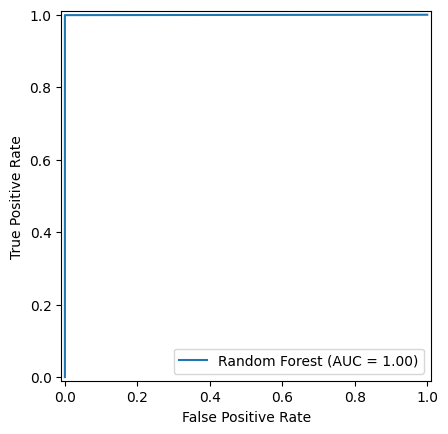

In [55]:
# binary example again
y_true = exp.experiment_scores[4]['train_true']
y_pred = exp.experiment_scores[4]['train_pred']
labels = exp.experiment_scores[4]['y_classes']

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Random Forest')
curve.plot()
plt.show()

# Tuning

* evident overfitting, since the tertiary target had the best accuracy, let's use that for tuning

In [56]:
# TRAINING WITH TIME SERIES CROSS VALIDATION

X_features = [features.R1_R2_waves]
y_features = [features.y_tertiary]

params = {
    'n_estimators': [100, 200, 500],
    'ccp_alpha': [0, 0.01, 0.02, 0.03],
    'min_samples_leaf': [1,2,5]
}

timecv = TimeSeriesSplit(n_splits=5)
clf = RandomForestClassifier(random_state=random_state, n_jobs=-1)
search = GridSearchCV(clf, params)

exp = models.SK_Classification_Experiment(df, X_features, y_features, estimators=[search])
exp.run_experiments()

In [57]:
clf = exp.experiment_scores[0]['estimator']
clf.best_params_

{'ccp_alpha': 0.01, 'min_samples_leaf': 1, 'n_estimators': 100}

In [58]:
print(exp.experiment_scores[0]['training_classification_report'])
print(exp.experiment_scores[0]['test_classification_report'])

              precision    recall  f1-score   support

      attack       0.71      1.00      0.83     44279
     natural       0.00      0.00      0.00     14738
    no event       0.00      0.00      0.00      3614

    accuracy                           0.71     62631
   macro avg       0.24      0.33      0.28     62631
weighted avg       0.50      0.71      0.59     62631

              precision    recall  f1-score   support

      attack       0.72      1.00      0.84     11295
     natural       0.00      0.00      0.00      3571
    no event       0.00      0.00      0.00       791

    accuracy                           0.72     15657
   macro avg       0.24      0.33      0.28     15657
weighted avg       0.52      0.72      0.60     15657



# Final Estimator
* adding a small penalty for cost-complexity tuning helped generalize the model
* see if this extends well for our other feature/target permutations


In [59]:
X_features = [['R1_Phase_A_power_wave'], features.R1_waves, features.R1_R2_waves] # features.all_power_waves
y_features = [features.y_binary, features.y_tertiary, features.y_broad_class, features.y_full_class]

In [60]:
# TRAINING WITH TIME SERIES CROSS VALIDATION
timecv = TimeSeriesSplit(n_splits=5)
clf = RandomForestClassifier(random_state=random_state, ccp_alpha= 0.01, min_samples_leaf=1, n_estimators=100)

exp = models.SK_Classification_Experiment(df, X_features, y_features, estimators=[clf])
exp.run_experiments()

# Evaluation - Classification Reports

### Binary Class Predictions

In [61]:
binary_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_binary]

for i in binary_predictions:
    print(i['X_features'])
    print('Training Scores')
    print(i['training_classification_report'])
    print('Test Scores')
    print(i['test_classification_report'])

['R1_Phase_A_power_wave']
Training Scores
              precision    recall  f1-score   support

      attack       0.71      1.00      0.83     44279
  not attack       0.00      0.00      0.00     18352

    accuracy                           0.71     62631
   macro avg       0.35      0.50      0.41     62631
weighted avg       0.50      0.71      0.59     62631

Test Scores
              precision    recall  f1-score   support

      attack       0.72      1.00      0.84     11295
  not attack       0.00      0.00      0.00      4362

    accuracy                           0.72     15657
   macro avg       0.36      0.50      0.42     15657
weighted avg       0.52      0.72      0.60     15657

['R1_Phase_A_voltage_wave', 'R1_Phase_A_current_wave', 'R1_Phase_A_power_wave', 'R1_Phase_B_voltage_wave', 'R1_Phase_B_current_wave', 'R1_Phase_B_power_wave', 'R1_Phase_C_voltage_wave', 'R1_Phase_C_current_wave', 'R1_Phase_C_power_wave']
Training Scores
              precision    recall  f1-

### Tertiary Class Predictions

In [62]:
tertiary_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_tertiary]

for i in tertiary_predictions:
    print(i['X_features'])
    print('Training Scores')
    print(i['training_classification_report'])
    print('Test Scores')
    print(i['test_classification_report'])

['R1_Phase_A_power_wave']
Training Scores
              precision    recall  f1-score   support

      attack       0.71      1.00      0.83     44279
     natural       0.00      0.00      0.00     14738
    no event       0.00      0.00      0.00      3614

    accuracy                           0.71     62631
   macro avg       0.24      0.33      0.28     62631
weighted avg       0.50      0.71      0.59     62631

Test Scores
              precision    recall  f1-score   support

      attack       0.72      1.00      0.84     11295
     natural       0.00      0.00      0.00      3571
    no event       0.00      0.00      0.00       791

    accuracy                           0.72     15657
   macro avg       0.24      0.33      0.28     15657
weighted avg       0.52      0.72      0.60     15657

['R1_Phase_A_voltage_wave', 'R1_Phase_A_current_wave', 'R1_Phase_A_power_wave', 'R1_Phase_B_voltage_wave', 'R1_Phase_B_current_wave', 'R1_Phase_B_power_wave', 'R1_Phase_C_voltage_wave'

### Broad Class Predictions

In [63]:
broad_class_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_broad_class]

for i in broad_class_predictions:
    print(i['X_features'])
    print('Training Scores')
    print(i['training_classification_report'])
    print('Test Scores')
    print(i['test_classification_report'])

['R1_Phase_A_power_wave']
Training Scores
                     precision    recall  f1-score   support

       attack fault       0.43      1.00      0.60     26975
 attack maintenance       0.00      0.00      0.00      2632
  command injection       0.00      0.00      0.00      6790
     data injection       0.00      0.00      0.00      7882
      natural fault       0.00      0.00      0.00     12032
natural maintenance       0.00      0.00      0.00      2706
           no event       0.00      0.00      0.00      3614

           accuracy                           0.43     62631
          macro avg       0.06      0.14      0.09     62631
       weighted avg       0.19      0.43      0.26     62631

Test Scores
                     precision    recall  f1-score   support

       attack fault       0.46      1.00      0.63      7223
 attack maintenance       0.00      0.00      0.00       514
  command injection       0.00      0.00      0.00      1947
     data injection       0

### Full Class Predictions

In [64]:
full_class_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_full_class]

for i in full_class_predictions:
    print(i['X_features'])
    print('Training Scores')
    print(i['training_classification_report'])
    print('Test Scores')
    print(i['test_classification_report'])

['R1_Phase_A_power_wave']
Training Scores
                                                              precision    recall  f1-score   support

                                     Command Injection to R1       0.00      0.00      0.00      1110
                                     Command Injection to R2       0.00      0.00      0.00      1090
                                     Command Injection to R3       0.00      0.00      0.00       994
                                     Command Injection to R4       0.00      0.00      0.00       968
                              Command injection to R1 and R2       0.00      0.00      0.00      1514
                              Command injection to R3 and R4       0.00      0.00      0.00      1114
                                     Fault from 10-19% on L1       0.00      0.00      0.00      1284
            Fault from 10-19% on L1 with R1 disabled & fault       0.00      0.00      0.00      1030
Fault from 10-19% on L1 with data injec

In [65]:
for i in exp.experiment_scores:
    print(i['X_features'])
    print(i['y_features'])
    print(i['test_f1'])
    print(i['test_accuracy'])

['R1_Phase_A_power_wave']
is_attack
0.41907836153161176
0.7214025675416746
['R1_Phase_A_power_wave']
scenario_class
0.27938557435440786
0.7214025675416746
['R1_Phase_A_power_wave']
scenario_broad_type
0.09019730269730271
0.46132720189052817
['R1_Phase_A_power_wave']
scenario_type
0.0026717196281885
0.05052053394647761
['R1_Phase_A_voltage_wave', 'R1_Phase_A_current_wave', 'R1_Phase_A_power_wave', 'R1_Phase_B_voltage_wave', 'R1_Phase_B_current_wave', 'R1_Phase_B_power_wave', 'R1_Phase_C_voltage_wave', 'R1_Phase_C_current_wave', 'R1_Phase_C_power_wave']
is_attack
0.41907836153161176
0.7214025675416746
['R1_Phase_A_voltage_wave', 'R1_Phase_A_current_wave', 'R1_Phase_A_power_wave', 'R1_Phase_B_voltage_wave', 'R1_Phase_B_current_wave', 'R1_Phase_B_power_wave', 'R1_Phase_C_voltage_wave', 'R1_Phase_C_current_wave', 'R1_Phase_C_power_wave']
scenario_class
0.27938557435440786
0.7214025675416746
['R1_Phase_A_voltage_wave', 'R1_Phase_A_current_wave', 'R1_Phase_A_power_wave', 'R1_Phase_B_voltage_w

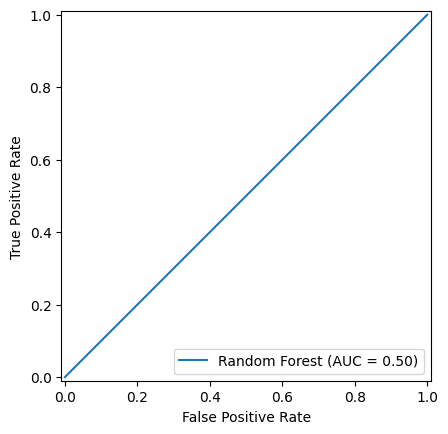

In [66]:
# binary example again
y_true = exp.experiment_scores[4]['train_true']
y_pred = exp.experiment_scores[4]['train_pred']
labels = exp.experiment_scores[4]['y_classes']

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Random Forest')
curve.plot()
plt.show()

['R1_Phase_A_voltage_wave', 'R1_Phase_A_current_wave', 'R1_Phase_A_power_wave', 'R1_Phase_B_voltage_wave', 'R1_Phase_B_current_wave', 'R1_Phase_B_power_wave', 'R1_Phase_C_voltage_wave', 'R1_Phase_C_current_wave', 'R1_Phase_C_power_wave']
is_attack


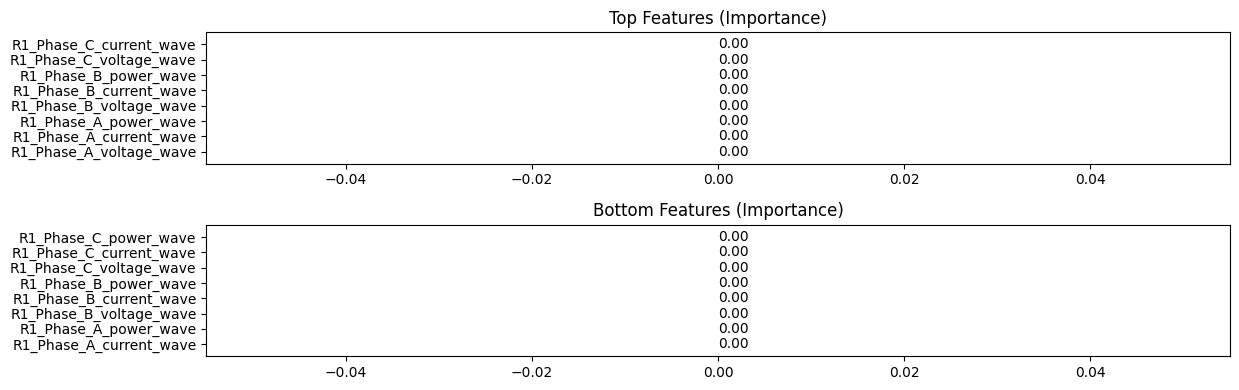

,feature,importance
0,R1_Phase_A_voltage_wave,0.0
1,R1_Phase_A_current_wave,0.0
2,R1_Phase_A_power_wave,0.0
3,R1_Phase_B_voltage_wave,0.0
4,R1_Phase_B_current_wave,0.0
5,R1_Phase_B_power_wave,0.0
6,R1_Phase_C_voltage_wave,0.0
7,R1_Phase_C_current_wave,0.0
8,R1_Phase_C_power_wave,0.0


In [67]:
# binary example - 4th index is R1 wave features
clf = exp.experiment_scores[4]['estimator']
X_features = exp.experiment_scores[4]['X_features']

print(X_features)
print(exp.experiment_scores[4]['y_features'])

plot_importance(X_features, clf)